In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler , PowerTransformer , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, root_mean_squared_error

In [379]:
df = pd.read_csv(r'D:\git\end to end\weatherHistory.csv')
df.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51


In [380]:
df.shape

(96453, 10)

In [381]:
list(df.columns)

['Formatted Date',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Cloud Cover',
 'Pressure (millibars)']

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  int64  
 7   Visibility (km)           96453 non-null  float64
 8   Cloud Cover               96453 non-null  int64  
 9   Pressure (millibars)      96453 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 7.4+ MB


In [383]:
df.isna().sum()

Formatted Date                0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Cloud Cover                   0
Pressure (millibars)          0
dtype: int64

In [384]:
df.dropna(inplace=True)

In [385]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.000000,95936.0,95936.000000
mean,11.940976,10.862531,0.734841,10.804936,187.518773,10.362402,0.0,1003.150038
std,9.570671,10.717812,0.195724,6.920727,107.385351,4.173780,0.0,117.276976
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.604167,2.276389,0.600000,5.796000,116.000000,8.372000,0.0,1011.890000
50%,12.033333,12.033333,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [386]:
df.skew(numeric_only=True)

Temperature (C)             0.091797
Apparent Temperature (C)   -0.059040
Humidity                   -0.715026
Wind Speed (km/h)           1.115995
Wind Bearing (degrees)     -0.154793
Visibility (km)            -0.492114
Cloud Cover                 0.000000
Pressure (millibars)       -8.399381
dtype: float64

In [387]:
df['Cloud Cover'].value_counts()

Cloud Cover
0    95936
Name: count, dtype: int64

In [388]:
df.drop(['Cloud Cover'],axis=1,inplace=True)
df.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [389]:
df['datetime'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['DayOfYear'] = df['datetime'].dt.dayofyear
df['Hour'] = df['datetime'].dt.hour

df['day_of_year_sin'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)

df['hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df = df.drop(['Formatted Date', 'DayOfYear', 'Hour'], axis=1)

df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),datetime,day_of_year_sin,day_of_year_cos,hour_sin,hour_cos
0,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,2006-03-31 22:00:00+00:00,0.999745,0.022576,-0.500000,0.866025
1,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,2006-03-31 23:00:00+00:00,0.999745,0.022576,-0.258819,0.965926
2,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,2006-04-01 00:00:00+00:00,0.999986,0.005376,0.000000,1.000000
3,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,2006-04-01 01:00:00+00:00,0.999986,0.005376,0.258819,0.965926
4,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,2006-04-01 02:00:00+00:00,0.999986,0.005376,0.500000,0.866025


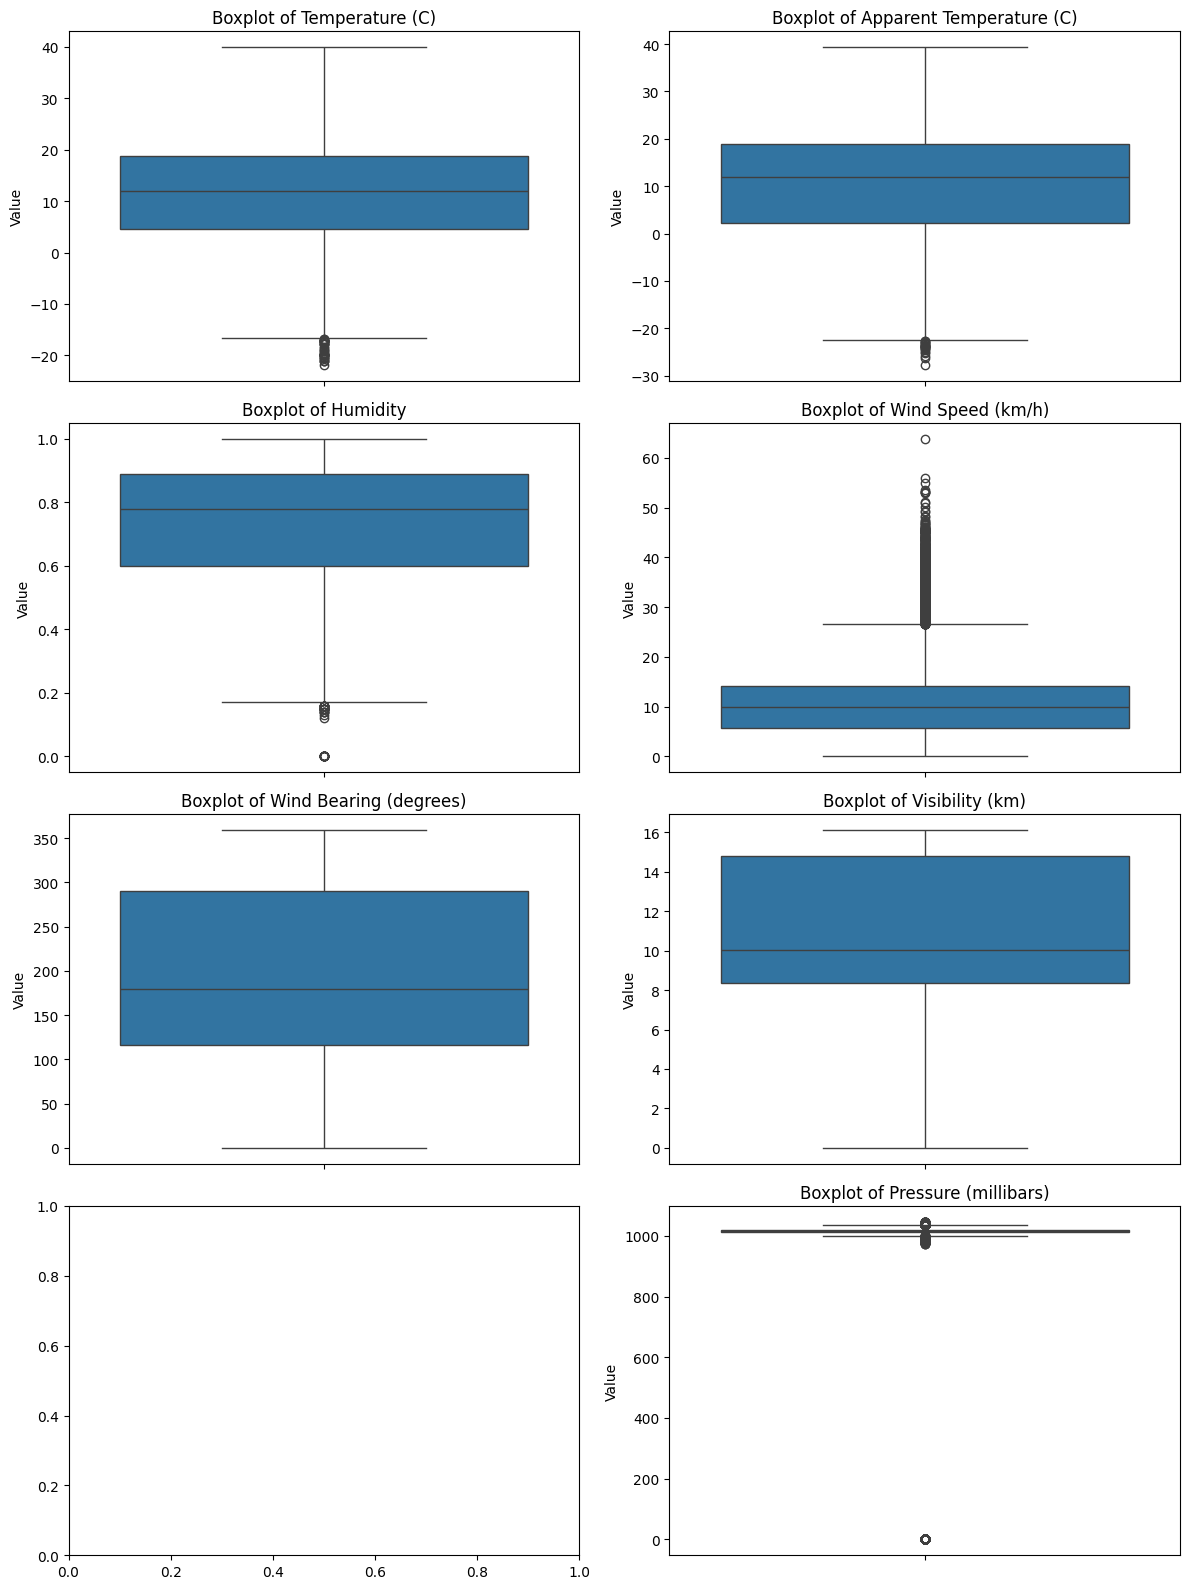

In [390]:
columns_to_plot = [
    'Temperature (C)',
    'Apparent Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)',
    'Cloud Cover',
    'Pressure (millibars)'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

for ax, col in zip(axes.flatten(), columns_to_plot):
    if col in df.columns:
        sns.boxplot(data=df, y=col, ax=ax)
        ax.set_title(f'Boxplot of {col}', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Value')
        
plt.tight_layout()

In [391]:
IQR = df['Pressure (millibars)'].quantile(0.75) - df['Pressure (millibars)'].quantile(0.25)
upper = df['Pressure (millibars)'].quantile(0.75) + 1.5 * IQR
lower = df['Pressure (millibars)'].quantile(0.25) - 1.5 * IQR
df = df[(df['Pressure (millibars)'] < upper) & (df['Pressure (millibars)'] > lower)]
df.shape

(91511, 13)

In [392]:
IQR = df['Visibility (km)'].quantile(0.75) - df['Visibility (km)'].quantile(0.25)
upper = df['Visibility (km)'].quantile(0.75) + 1.5 * IQR
lower = df['Visibility (km)'].quantile(0.25) - 1.5 * IQR
df = df[(df['Visibility (km)'] < upper) & (df['Visibility (km)'] > lower)]
df.shape

(89536, 13)

In [393]:
IQR = df['Humidity'].quantile(0.75) - df['Humidity'].quantile(0.25)
upper = df['Humidity'].quantile(0.75) + 1.5 * IQR
lower = df['Humidity'].quantile(0.25) - 1.5 * IQR
df = df[(df['Humidity'] < upper) & (df['Humidity'] > lower)]
df.shape

(89517, 13)

In [394]:
IQR = df['Wind Speed (km/h)'].quantile(0.75) - df['Wind Speed (km/h)'].quantile(0.25)
upper = df['Wind Speed (km/h)'].quantile(0.75) + 1.5 * IQR
lower = df['Wind Speed (km/h)'].quantile(0.25) - 1.5 * IQR
df = df[(df['Wind Speed (km/h)'] < upper) & (df['Wind Speed (km/h)'] > lower)]
df.shape

(86698, 13)

In [395]:
df.skew(numeric_only=True)

Temperature (C)             0.051363
Apparent Temperature (C)   -0.120333
Humidity                   -0.690852
Wind Speed (km/h)           0.555885
Wind Bearing (degrees)     -0.146679
Visibility (km)            -0.393307
Pressure (millibars)        0.094939
day_of_year_sin             0.009385
day_of_year_cos             0.113568
hour_sin                    0.015086
hour_cos                   -0.011587
dtype: float64

In [396]:
cols_to_transform = ['Humidity', 'Wind Speed (km/h)']

pt = PowerTransformer(method='yeo-johnson', standardize=True)
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

In [397]:
df.skew(numeric_only=True)

Temperature (C)             0.051363
Apparent Temperature (C)   -0.120333
Humidity                   -0.197094
Wind Speed (km/h)          -0.049952
Wind Bearing (degrees)     -0.146679
Visibility (km)            -0.393307
Pressure (millibars)        0.094939
day_of_year_sin             0.009385
day_of_year_cos             0.113568
hour_sin                    0.015086
hour_cos                   -0.011587
dtype: float64

In [398]:
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),datetime,day_of_year_sin,day_of_year_cos,hour_sin,hour_cos
0,rain,9.472222,7.388889,0.847067,0.736945,251,15.8263,1015.13,2006-03-31 22:00:00+00:00,0.999745,0.022576,-0.500000,0.866025
1,rain,9.355556,7.227778,0.633758,0.757900,259,15.8263,1015.63,2006-03-31 23:00:00+00:00,0.999745,0.022576,-0.258819,0.965926
2,rain,9.377778,9.377778,0.847067,-1.120770,204,14.9569,1015.94,2006-04-01 00:00:00+00:00,0.999986,0.005376,0.000000,1.000000
3,rain,8.288889,5.944444,0.430830,0.734611,269,15.8263,1016.41,2006-04-01 01:00:00+00:00,0.999986,0.005376,0.258819,0.965926
4,rain,8.755556,6.977778,0.430830,0.267181,259,15.8263,1016.51,2006-04-01 02:00:00+00:00,0.999986,0.005376,0.500000,0.866025


In [399]:
df['Precip Type'] = df['Precip Type'].map({'rain': 0, 'snow': 1}).astype(int)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),datetime,day_of_year_sin,day_of_year_cos,hour_sin,hour_cos
0,0,9.472222,7.388889,0.847067,0.736945,251,15.8263,1015.13,2006-03-31 22:00:00+00:00,0.999745,0.022576,-0.500000,0.866025
1,0,9.355556,7.227778,0.633758,0.757900,259,15.8263,1015.63,2006-03-31 23:00:00+00:00,0.999745,0.022576,-0.258819,0.965926
2,0,9.377778,9.377778,0.847067,-1.120770,204,14.9569,1015.94,2006-04-01 00:00:00+00:00,0.999986,0.005376,0.000000,1.000000
3,0,8.288889,5.944444,0.430830,0.734611,269,15.8263,1016.41,2006-04-01 01:00:00+00:00,0.999986,0.005376,0.258819,0.965926
4,0,8.755556,6.977778,0.430830,0.267181,259,15.8263,1016.51,2006-04-01 02:00:00+00:00,0.999986,0.005376,0.500000,0.866025


In [400]:
df['Precip Type'].value_counts()

Precip Type
0    78520
1     8178
Name: count, dtype: int64

In [401]:
upsample_count = df['Precip Type'].value_counts().max()
df_minority = df[df['Precip Type'] == 1]   
df_minority_upsampled = df_minority.sample(upsample_count, replace=True, random_state=42)
df_majority = df[df['Precip Type'] == 0]
df= pd.concat([df_majority, df_minority_upsampled])
df['Precip Type'].value_counts()

Precip Type
0    78520
1    78520
Name: count, dtype: int64

In [402]:
x = df.drop(['Precip Type','datetime'], axis=1)
y = df['Precip Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [403]:
(x.columns)

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'day_of_year_sin', 'day_of_year_cos',
       'hour_sin', 'hour_cos'],
      dtype='object')

In [404]:
l_reg = LogisticRegression( max_iter=2000)
l_reg.fit(x_train, y_train)
y_pred_r = l_reg.predict(x_test)
print("R2 score:", r2_score(y_test, y_pred_r))
print("MSE:", mean_squared_error(y_test, y_pred_r))
print("RMSE:", root_mean_squared_error(y_test, y_pred_r))
print("MAE:", mean_absolute_error(y_test, y_pred_r))

R2 score: 0.989428935453877
MSE: 0.002642638818135507
RMSE: 0.051406602865152515
MAE: 0.002642638818135507


In [405]:
from scipy.stats import randint


r_reg = RandomForestRegressor()
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=r_reg,
    param_distributions=param_dist,
    n_iter=50,   
    cv=3,             
    scoring='r2',     
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise'
)

random_search.fit(x_train, y_train)
best_r_reg = random_search.best_estimator_
y_pred_r = best_r_reg.predict(x_test)
print("R2 score:", r2_score(y_test, y_pred_r))
print("MSE:", mean_squared_error(y_test, y_pred_r))
print("RMSE:", root_mean_squared_error(y_test, y_pred_r))
print("MAE:", mean_absolute_error(y_test, y_pred_r))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
R2 score: 0.9999854052444419
MSE: 3.648513109595799e-06
RMSE: 0.0019101081408118754
MAE: 0.00017060671158550904


In [406]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


x_reg = XGBRegressor()
xgb_grid = RandomizedSearchCV(x_reg, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
xgb_grid.fit(x_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)
print("XGB R2:", r2_score(y_test, y_pred_xgb))
print("XGB MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGB RMSE:", root_mean_squared_error(y_test, y_pred_xgb))
print("XGB MAE:", mean_absolute_error(y_test, y_pred_xgb))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGB R2: 0.9992861747741699
XGB MSE: 0.00017844169633463025
XGB RMSE: 0.013358207419514656
XGB MAE: 0.00041176812374033034


In [407]:
import pickle
with open('rain_prediction_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)
with open('pt_transformer.pkl', 'wb') as f:
    pickle.dump(pt, f)

In [408]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("Precipitation Prediction Experiment")

2025/10/27 14:12:22 INFO mlflow.tracking.fluent: Experiment with name 'Precipitation Prediction Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/git/end%20to%20end/mlruns/886923472806864712', creation_time=1761554542152, experiment_id='886923472806864712', last_update_time=1761554542152, lifecycle_stage='active', name='Precipitation Prediction Experiment', tags={}>